In [3]:
import tensorflow as tf
import numpy as np
import random 
import os 
from tqdm import tqdm
from skimage.io import imread
from skimage.io import imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

Setting Image Hieght and Width


In [4]:
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
CHANNELS = 3

In [5]:
train_path = "stage1_train/"
test_path = "stage1_test/"

In [6]:
train_ids = next(os.walk(train_path))[1]
test_ids = next(os.walk(test_path))[1]


In [7]:
print(len(test_ids))

65


In [8]:
from pickletools import uint8


X_train = np.zeros((len(train_ids), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMAGE_HEIGHT,  IMAGE_WIDTH, 1), dtype=np.bool)



Resizing Image

In [9]:

print("Resizing the training images and masks")

for n, id_ in tqdm(enumerate(train_ids), total = len(train_ids)):
    path = train_path + id_
    img= imread(path + '/images/' + id_ + '.png')[:, :, :CHANNELS]
    img = resize(img,(IMAGE_HEIGHT,IMAGE_WIDTH), mode = 'constant', preserve_range=True)
    X_train[n] = img

    mask = np.zeros((IMAGE_HEIGHT,IMAGE_WIDTH,1), dtype = np.bool)

    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMAGE_HEIGHT,IMAGE_WIDTH), mode = 'constant', preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)

    Y_train[n] =  mask   

Resizing the training images and masks


100%|██████████| 670/670 [03:39<00:00,  3.06it/s]


In [10]:
print(" Resizing the Test Images")

X_test = np.zeros((len(test_ids), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.uint8)

sizes_test = []

for n, id_ in tqdm(enumerate(test_ids), total = len(test_ids)):
    path = test_path + id_
    img = imread(path + '/images/' + id_ + '.png')[:, :, :CHANNELS ]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMAGE_HEIGHT, IMAGE_WIDTH), mode = 'constant', preserve_range = True)
    X_test[n] = img

print('done!')


 Resizing the Test Images


100%|██████████| 65/65 [00:01<00:00, 60.37it/s]

done!


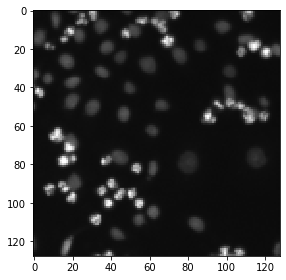

In [11]:
x = np.random.randint(0,len(test_ids))
imshow(X_test[x])

plt.show()
# imshow(np.squeeze(Y_train[x]))
# plt.show()


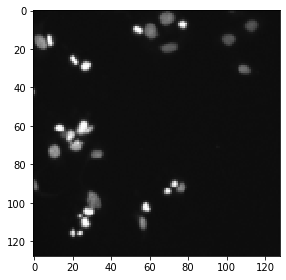

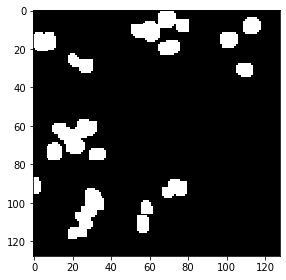

In [12]:
x = np.random.randint(0,len(train_ids))
imshow(X_train[x])

plt.show()
imshow(np.squeeze(Y_train[x]))
plt.show()


In [13]:
input = tf.keras.layers.Input((IMAGE_HEIGHT, IMAGE_WIDTH, CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x/255)(input)

c1 = tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer ='he_normal', padding = 'same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3,3), activation = "relu", kernel_initializer ='he_normal', padding = 'same')(c1)

p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)

c2 =tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer='he_normal', padding = 'same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3,3), activation = "relu", kernel_initializer ='he_normal', padding = 'same')(c2)

p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)

c3 =tf.keras.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer='he_normal', padding = 'same')(p2)
c3 = tf.keras.layers.Dropout(0.1)(c3)
c3 = tf.keras.layers.Conv2D(64, (3,3), activation = "relu", kernel_initializer ='he_normal', padding = 'same')(c3)

p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)

c4 =tf.keras.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer='he_normal', padding = 'same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3,3), activation = "relu", kernel_initializer ='he_normal', padding = 'same')(c4)

p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)

c5 =tf.keras.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer='he_normal', padding = 'same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256, (3,3), activation = "relu", kernel_initializer ='he_normal', padding = 'same')(c5)

p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)






#Contrcting path
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[input], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
__________________

2022-09-15 16:14:56.144002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-15 16:14:56.144409: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=32, epochs=50, callbacks=callbacks)


2022-09-15 16:14:56.358181: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-09-15 16:14:56.358192: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2022-09-15 16:14:56.358696: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-09-15 16:14:56.807223: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-15 16:14:56.811491: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-09-15 16:14:57.217837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


 1/19 [>.............................] - ETA: 19s - loss: 0.7018 - accuracy: 0.3649

2022-09-15 16:14:57.928851: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2022-09-15 16:14:57.928865: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.


 2/19 [==>...........................] - ETA: 4s - loss: 0.6948 - accuracy: 0.5070 

2022-09-15 16:14:58.166780: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-09-15 16:14:58.175977: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2022-09-15 16:14:58.190872: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2022_09_15_16_14_58
2022-09-15 16:14:58.193214: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to logs/train/plugins/profile/2022_09_15_16_14_58/192.168.1.7.trace.json.gz
2022-09-15 16:14:58.206480: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/train/plugins/profile/2022_09_15_16_14_58
2022-09-15 16:14:58.206807: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for memory_profile.json.gz to logs/train/plugins/profile/2022_09_15_16_14_58/192.168.1.7.memory_profile.json.gz
2022-09-15 16:14:58.209452: I ten

19/19 [==============================] - ETA: 0s - loss: 0.6553 - accuracy: 0.7250

2022-09-15 16:15:02.360170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 6s 265ms/step - loss: 0.6553 - accuracy: 0.7250 - val_loss: 0.6207 - val_accuracy: 0.7681
Epoch 2/50
19/19 [==============================] - 4s 234ms/step - loss: 0.5113 - accuracy: 0.7524 - val_loss: 0.3569 - val_accuracy: 0.7839
Epoch 3/50
19/19 [==============================] - 4s 232ms/step - loss: 0.3325 - accuracy: 0.8118 - val_loss: 0.3177 - val_accuracy: 0.8743
Epoch 4/50
19/19 [==============================] - 4s 232ms/step - loss: 0.2420 - accuracy: 0.9077 - val_loss: 0.1969 - val_accuracy: 0.9231
Epoch 5/50
19/19 [==============================] - 4s 234ms/step - loss: 0.1749 - accuracy: 0.9329 - val_loss: 0.1704 - val_accuracy: 0.9361
Epoch 6/50
19/19 [==============================] - 4s 232ms/step - loss: 0.1673 - accuracy: 0.9364 - val_loss: 0.1451 - val_accuracy: 0.9421
Epoch 7/50
19/19 [==============================] - 4s 233ms/step - loss: 0.1450 - accuracy: 0.9453 - val_loss: 0.1398 - val_accuracy: 0.9449
Epoch 8/50
19/19 

3/3 [==============================] - 0s 63ms/step


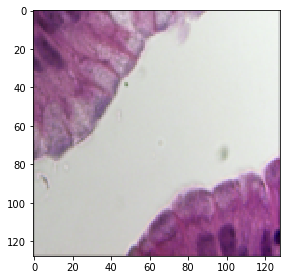

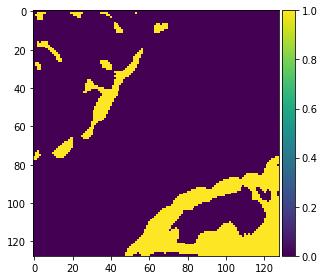

In [17]:

preds_test = model.predict(X_test, verbose=1)

 

preds_test_t = (preds_test > 0.5).astype(np.uint8)




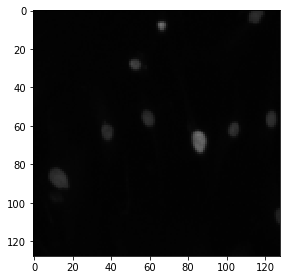

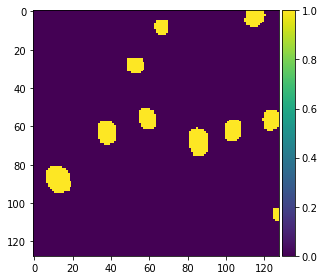

In [18]:
ix = np.random.randint(0, 6)
imshow(X_test[ix])
plt.show()

imshow(np.squeeze(preds_test_t[ix]))
plt.show()